# **Bayesian** modeling and decision theory
### **Week 2**-STAT 348 (Spring 2024)

#### Relevant materials / reading:
- Scott Linderman's [slides](https://github.com/slinderman/stats305c/blob/spring2023/slides/lecture01-bayes_normal.pdf) on Bayesian analysis of Gaussian models
- Murphy (2007) ["Conjugate Bayesian analysis of the Gaussian distribution"](https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf)
- Jeffrey Miller's [slides](https://jwmi.github.io/BMB/5-Bayesian-linear-regression.pdf) on Bayesian linear regression
- Chap 9 of ["Mathematics for Machine Learning"](https://mml-book.github.io/book/mml-book.pdf)
----


### Regularizers as **priors on parameters**
- The minimizer of squared error loss with **$\ell_2$-regularizatio**n
$$\widehat{\beta} \leftarrow \underset{\beta}{\textrm{argmin}} \sum_{i=1}^n (y_i - \beta)^2 + \alpha\sum_{j=1}^p \beta_j^2$$
...is the maximum a posteriori (MAP) estimate for a model with a Gaussian likelihood and **Gaussian prior**:
$$\widehat{\beta} \leftarrow \underset{\beta}{\textrm{argmax}} \left[\prod_{i=1}^n \mathcal{N}(y_i;\,\beta,\, 1)\right]\, \prod_{j=1}^p\mathcal{N}(\beta_j;\,0,\alpha^{-1})$$
- The minimizer of squared error loss with **$\ell_1$-regularization**...
$$\widehat{\beta} \leftarrow \underset{\beta}{\textrm{argmin}} \sum_{i=1}^n (y_i - \beta)^2 + \alpha\sum_{j=1}^p |\beta_j|$$
- ...is the MAP estimate for a model with a Gaussian likelihood and **Laplace prio**r
$$\widehat{\beta} \leftarrow \underset{\beta}{\textrm{argmax}} \left[\prod_{i=1}^n \mathcal{N}(y_i;\,\beta,\, 1)\right]\, \prod_{j=1}^p\textrm{Laplace}(\beta_j;\,0,\alpha^{-1})$$
----

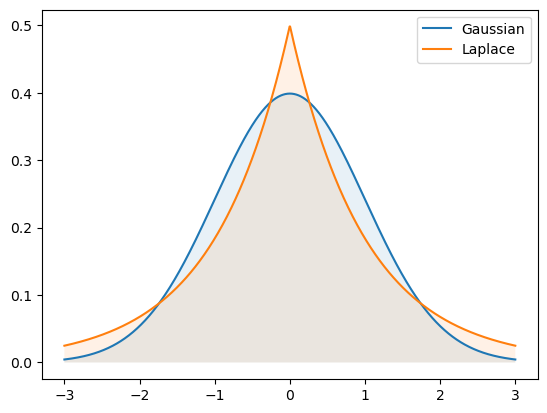

In [215]:
# generate a gaussian and laplace distribution
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

alpha = 1
x = np.linspace(-3, 3, 1000)
st.laplace(0, scale=1/np.sqrt(alpha))
plt.plot(x, st.norm.pdf(x, 0, 1/np.sqrt(alpha)), label=f'Gaussian')
plt.fill_between(x, st.norm.pdf(x, 0, 1/np.sqrt(alpha)), alpha=0.1)
plt.plot(x, st.laplace.pdf(x, 0, 1/np.sqrt(alpha)), label=f'Laplace')
plt.fill_between(x, st.laplace.pdf(x, 0, 1/np.sqrt(alpha)), alpha=0.1)
plt.legend()
plt.show()

#### Do (frequentist) parameters have prior distributions?
- Last week we used the term prior to mean a base-rate frequency

- There is a population of $Y$, so $\textrm{Pr}(Y=1)$ is perfectly understandable as simply the frequency at which $Y=1$ occurs in the population

- This frequency (or an estimate of it) forms a good guess for $Y_i$ a priori (without observing $X_i$)

- A parameter in the frequentist sense is a _fact_ about the population---e.g., $\theta = \textrm{Pr}(Y=1)$

- We estimate parameters based on samples from the population---e.g., $\widehat{\theta}(Y_1,\dots, Y_n) = \frac{1}{n}\sum_{i=1}^n Y_i$

- Our sample is a random variable, therefore our _estimate_ $\widehat{\theta}$ is random variable

- But the _parameter_ is not a random variable. It is a fact. It does not have a prior distribution.
----

## **Bayesian approach** to parameter inference

### Example: **Normal-normal model**
- $\mu \sim \mathcal{N}(\mu_0, \sigma_0^2)$ (prior)
- $y_i \stackrel{\textrm{iid}}\sim \mathcal{N}(\mu, \sigma^2)$ (likelihood)

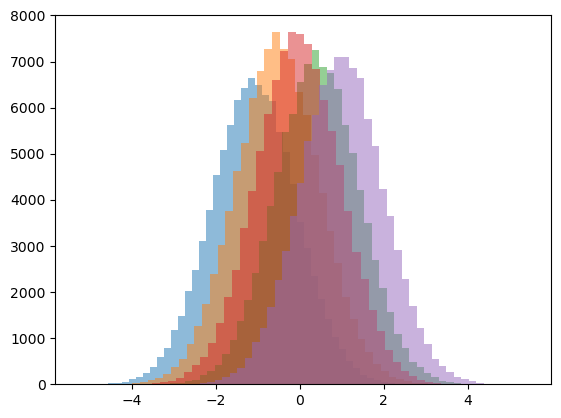

In [41]:
def sample_normal_normal(s, m0, s0, n):
    mu = st.norm(m0, scale=s0).rvs()
    y = st.norm(mu, scale=s).rvs(n)
    return y

for _ in range(5):
    y = sample_normal_normal(s=1, m0=0, s0=1, n=100000)
    plt.hist(y, alpha=0.5, bins=50)
plt.show()

### **Terminology**
- **data** (observed): $\boldsymbol{y} =(y_1, \dots y_n)$

- **parameters** (unobserved): $\boldsymbol{\theta} = \{\mu\}$ 

- **hyperparameters** (fixed / known): $\boldsymbol{\eta} = \{\mu_0, \sigma_0, \sigma\}$ 

- **model** (joint distribution): $P(\boldsymbol{y}, \boldsymbol{\theta};\,\boldsymbol{\eta}) \equiv P_{\boldsymbol{\eta}}(\boldsymbol{y}, \boldsymbol{\theta}) \equiv P(\boldsymbol{y}, \boldsymbol{\theta})$

- **likelihood** (conditional distribution of data): $P(\boldsymbol{y} \mid \boldsymbol{\theta};\,\boldsymbol{\eta})$

- **evidence** (marginal distribution of data): $P(\boldsymbol{y};\,\boldsymbol{\eta})$

- **prior** (marginal distribution parameters): $P(\boldsymbol{\theta};\,\boldsymbol{\eta})$

- **posterior** (conditional distribution of parameters): $P(\boldsymbol{\theta} \mid \boldsymbol{y};\,\boldsymbol{\eta})$

- **posterior predictive** (marginal distribution of new data): $P(y_{n+1} \mid \boldsymbol{y}_{1:n};\,\boldsymbol{\eta})$

### Posterior (**Bayes rule**)

$$\begin{align}
\overbrace{P(\boldsymbol{\theta} \mid \boldsymbol{y};\, \boldsymbol{\eta})}^{\textrm{posterior}} &= \frac{\overbrace{P(\boldsymbol{y}, \boldsymbol{\theta};\,\boldsymbol{\eta})}^{\textrm{joint}}}{\underbrace{P(\boldsymbol{y};\, \boldsymbol{\eta})}_{\textrm{evidence}}} = \frac{\overbrace{P(\boldsymbol{\theta};\,\boldsymbol{\eta})}^{\textrm{prior}} \,\,\overbrace{P(\boldsymbol{y} \mid \boldsymbol{\theta};\,\boldsymbol{\eta})}^{\textrm{likelihood}}}{\int P(\boldsymbol{\theta};\,\boldsymbol{\eta}) \,\, P(\boldsymbol{y} \mid \boldsymbol{\theta};\,\boldsymbol{\eta}) \textrm{d}\boldsymbol{\theta}} 
\end{align}
$$

Note that the **evidence** is constant with respect to the parameters: 

$$\begin{align}
\overbrace{P(\boldsymbol{\theta} \mid \boldsymbol{y};\, \boldsymbol{\eta})}^{\textrm{posterior}} \,\, &\propto_{\boldsymbol{\theta}} \,\, \overbrace{P(\boldsymbol{\theta};\,\boldsymbol{\eta})}^{\textrm{prior}} \,\, \overbrace{P(\boldsymbol{y} \mid \boldsymbol{\theta};\,\boldsymbol{\eta})}^{\textrm{likelihood}}
\end{align}

### **Deriving the posterior** in the normal-normal model (for known $\sigma$)

- **prior**: $P(\boldsymbol{\theta};\,\boldsymbol{\eta}) \equiv \mathcal{N}(\mu; \mu_0, \sigma_0^2)$

- **likelihood**: $P(\boldsymbol{y} \mid \boldsymbol{\theta};\,\boldsymbol{\eta}) \equiv \prod_{i=1}^n \mathcal{N}(y_i;\, \mu, \sigma^2)$

- **posterior**: [Derive the following steps on the board.]

$$\begin{align}
P(\mu \mid \boldsymbol{y}) \,\, &\propto_{\mu} \,\, \mathcal{N}(\mu; \mu_0, \sigma_0^2) \,\,\prod_{i=1}^n \mathcal{N}(y_i;\, \mu, \sigma^2) \\[2em]
 &\propto_{\mu} \exp\left\{-\tfrac{1}{2} \left(J_n \mu^2 + 2\mu\,h_n\right)\right\} \\[2em]
&\propto_{\mu} \,\,\mathcal{N}(\mu;\, \underbrace{h_n J_n^{-1}}_{\triangleq \mu_n},\, \underbrace{J_n^{-1}}_{\triangleq \sigma_n^2})
\end{align}$$

where $J_n= \tfrac{1}{\sigma_0^2} + \tfrac{n}{\sigma^2}$ and $h_n \triangleq \tfrac{\mu_0}{\sigma_0^2} + \tfrac{\sum_{i=1}^n y_i}{\sigma^2}$

- This is an example of a **conjugate** model: the prior and posterior are in the same family.

- [On the board] verify the conjugate relationship.

In [113]:
def get_posterior_normal_normal(y, s, m0, s0):
    j = 1/s0**2 + len(y)/s**2
    h = m0/s0**2 + np.sum(y)/s**2
    return st.norm(h/j, scale=1/np.sqrt(j))

def plot_posterior_prior_data_normal_normal(y, s, m0, s0):
    # plot short vertical lines for each data point
    for i in range(n):
        label = None if i > 0 else 'data'
        plt.plot([y[i], y[i]], [0, 0.1], 'y', label=label)

    # plot prior
    prior = st.norm(m0, scale=s0)
    x = np.linspace(y.min()-s, y.max()+s, 1000)
    plt.plot(x, prior.pdf(x), color='blue', label='prior')
    plt.fill_between(x, 0, prior.pdf(x), alpha=0.25, color='blue')

    # compute and plot
    posterior = get_posterior_normal_normal(y, s, m0, s0)
    plt.plot(x, posterior.pdf(x), color='green', label='posterior')
    plt.fill_between(x, 0, posterior.pdf(x), alpha=0.25, color='green')

    plt.legend()
    plt.show()

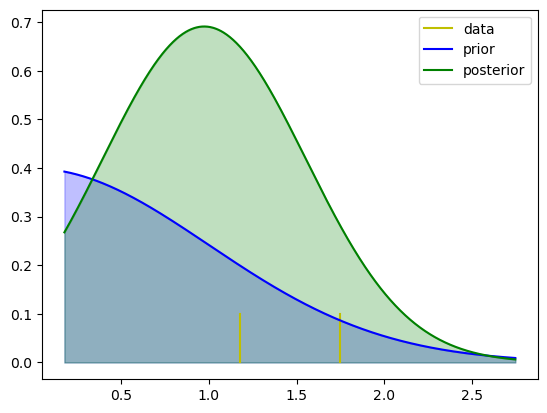

In [217]:
s = 1
m0 = 0
s0 = 1
n = 2

y = sample_normal_normal(s=s, m0=m0, s0=s0, n=n)
plot_posterior_prior_data_normal_normal(y, s, m0, s0)

### **Posterior parameters** in the normal-normal model (for known $\sigma$)

- The **posterior mean** is equal to [derive on board]:
$$\begin{align}
\mu_n = h_n J_n^{-1} &= \left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n y_i}{\sigma^2}\right)\,\left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1} \\[3em]
&= q_n \, \mu_0 + (1-q_n) \widehat{\mu}^{\textrm{MLE}}_n\\[2em]
q_n &\triangleq \frac{\sigma^2}{\sigma^2 + n\sigma_0}
\end{align}$$

- The **posterior variance** is equal to:

$$\begin{align}
\sigma_n^2 = J_n^{-1} &= \,\left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1}
\end{align}$$

- Think about $n=0$ or $n \rightarrow \infty$

- Think about an **uninformative prior** $\mu_0=0$ and $\sigma_0^2 \rightarrow \infty$

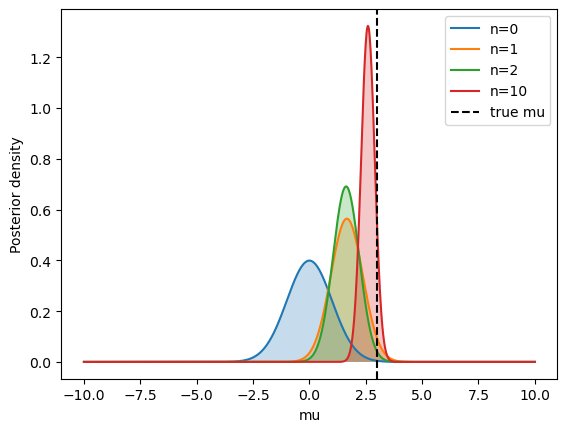

In [118]:
s = 1
m0 = 0
s0 = 1
n = 25

# hard code mu
mu = 3

sequence_of_ys = [np.array([])]
for n in [1, 1, 8]:
    new_y = st.norm(mu, scale=s).rvs(n)
    y = np.array(list(sequence_of_ys[-1]) + list(new_y))
    sequence_of_ys.append(y)

for y in sequence_of_ys:
    posterior = get_posterior_normal_normal(y, s, m0, s0)
    x = np.linspace(-10, 10, 1000)
    plt.plot(x, posterior.pdf(x), label=f'n={len(y)}')
    plt.fill_between(x, posterior.pdf(x), alpha=0.25)

plt.axvline(mu, color='black', linestyle='--', label='true mu')
plt.ylabel('Posterior density')
plt.xlabel('mu')

plt.legend()
plt.show()

# y = sample_normal_normal(s=s, m0=m0, s0=s0, n=n)
# plot_posterior_prior_data(y, s, m0, s0)

### **Posterior updating**

- Observing a new data point $y_{n+1}$ reduces to incrementing **sufficient statistics**:
$$ 
\begin{align}
\mu_{n+1} &= \frac{\sigma^2}{\sigma^2 + (n+1)\sigma^2_0} \, \mu_0 + \frac{(n+1)\sigma_0^2}{\sigma^2 + (n+1)\sigma_0} \,\frac{\sum_{i=1}^{n+1} y_i}{n+1}\\
% 
\sigma_{n+1}^2 &= \,\left(\frac{1}{\sigma_0^2} + \frac{n+1}{\sigma^2}\right)^{-1}
\end{align}
$$
- We will formalize this more next week

### **Posterior predictive** distribution

- [Show on the board]:
$$P(y_{n+1} \mid \boldsymbol{y}_{1:n}) = \mathcal{N}(y_{n+1};\, \mu_n,\, \sigma^2 + \sigma_n^2)$$


---
### Example: **Gamma-normal model** (for known $\mu$)
- Defined in terms of **precision** $\tau \equiv \tfrac{1}{\sigma^2}$
- $\tau \sim \Gamma(a_0, b_0)$ (prior)
- $y_i \stackrel{\textrm{iid}}\sim \mathcal{N}(\mu, \tau^{-1})$ (likelihood)


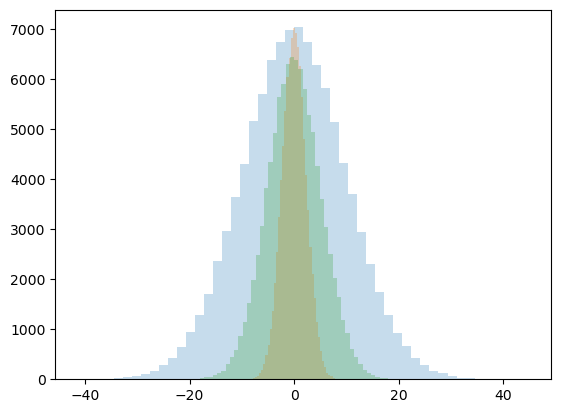

In [108]:
def sample_gamma_normal(mu, a0, b0, n):
    t = st.gamma(a0, scale=1/b0).rvs()
    y = st.norm(mu, scale=np.sqrt(1/t)).rvs(n)
    return y

for _ in range(3):
    y = sample_gamma_normal(mu=0, a0=1, b0=5, n=100000)
    plt.hist(y, alpha=0.25, bins=50)
plt.show()

### **Deriving the posterior** in the gamma-normal model (for known $\mu$)

- **posterior**: [Derive the following steps on the board.]

$$\begin{align}
P(\tau \mid \boldsymbol{y}) \,\, &\propto_{\tau} \,\, \Gamma(\tau; a_0, b_0) \,\,\prod_{i=1}^n \mathcal{N}(y_i;\, \mu, \tau^{-1}) \\[2em]
% 
 &\propto_{\tau} \tau^{a_0 + \tfrac{n}{2} -1} \exp\Big\{-\tau\big(b_0 + \sum_{i=1}^n (y_i - \mu)^2\big)\Big\} \\[2em]
% 
 &\propto_{\tau} \Gamma\Big(\tau;\, \underbrace{a_0 + \tfrac{n}{2}}_{\triangleq a_n},\, \underbrace{b_0 + \tfrac{1}{2}\sum_{i=1}^n (y_i - \mu)^2}_{\triangleq b_n}\Big)
\end{align}$$

- Another example of a **conjugate** model.

- The **posterior mean** is equal to:$$\begin{align}
\mathbb{E}[\tau \mid \boldsymbol{y}] = \frac{a_n}{b_n} &= \frac{a_0 + \tfrac{n}{2}}{b_0 + \tfrac{1}{2}\sum_{i=1}^n (y_i - \mu)^2}\\[2em]
&=  \frac{a_0 + \tfrac{n}{2}}{b_0 + \tfrac{n}{2}\widehat{\textrm{Var}}(\boldsymbol{y})}
= \frac{\tfrac{2a_0}{n} + 1}{\tfrac{2b_0}{n} + \widehat{\textrm{Var}}(\boldsymbol{y})}
\end{align}$$
- The **posterior variance** is equal to:$$\begin{align}
\textrm{Var}[\tau \mid \boldsymbol{y}] = \frac{a_n}{b_n^2}
&= \frac{a_0 + \tfrac{n}{2}}{\left(b_0 + \tfrac{n}{2}\widehat{\textrm{Var}}(\boldsymbol{y})\right)^2}\\[2em]
\end{align}$$
- Think about $n=0$ or $n \rightarrow \infty$

- Think about an **uninformative prior** $a_0 \rightarrow 0$ and $b_0 \rightarrow 0$


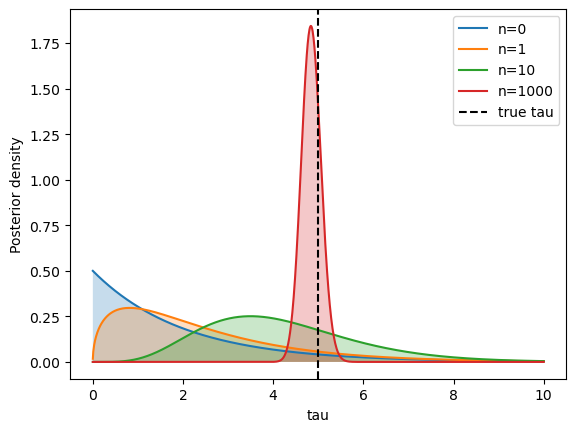

In [185]:
def get_posterior_gamma_normal(y, mu, a0, b0):
    an = a0 + len(y)/2
    bn = b0 + np.sum((y - mu)**2) / 2
    return st.gamma(an, scale=1/bn)
    
mu = 1
a0 = 1
b0 = 0.5

# hard code mu
t = 5

sequence_of_ys = [np.array([])]
for n in [1, 9, 990]:
    new_y = st.norm(mu, scale=np.sqrt(1/t)).rvs(n)
    y = np.array(list(sequence_of_ys[-1]) + list(new_y))
    sequence_of_ys.append(y)

for y in sequence_of_ys:
    posterior = get_posterior_gamma_normal(y, mu, a0, b0)
    x = np.linspace(0.001, 10, 1000)
    plt.plot(x, posterior.pdf(x), label=f'n={len(y)}')
    plt.fill_between(x, posterior.pdf(x), alpha=0.25)

plt.axvline(t, color='black', linestyle='--', label='true tau')
plt.ylabel('Posterior density')
plt.xlabel('tau')

plt.legend()
plt.show()
# plot_posterior_prior_data(y, s, m0, s0)

### Example: **Normal-gamma-normal model**

<!-- Use https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf (sec 3)-->
- This model is based on the **normal-gamma** bivariate distribution: $$(\mu, \tau) \sim \textrm{NG}(\mu_0, \kappa_0, a_0, b_0)$$

- Another way to write this distribution is as: $$\begin{align}
\tau &\sim \Gamma(a_0, b_0) \\
\mu \mid \tau &\sim \mathcal{N}(\mu_0, (\kappa_0\, \tau)^{-1})
\end{align}$$

- The likelihood is then the same as before: $$y_i  \mid \tau, \mu \stackrel{\textrm{iid}}{\sim}\mathcal{N}(\mu, \tau^{-1})$$

- It will be useful to draw the **graphical model** [board]

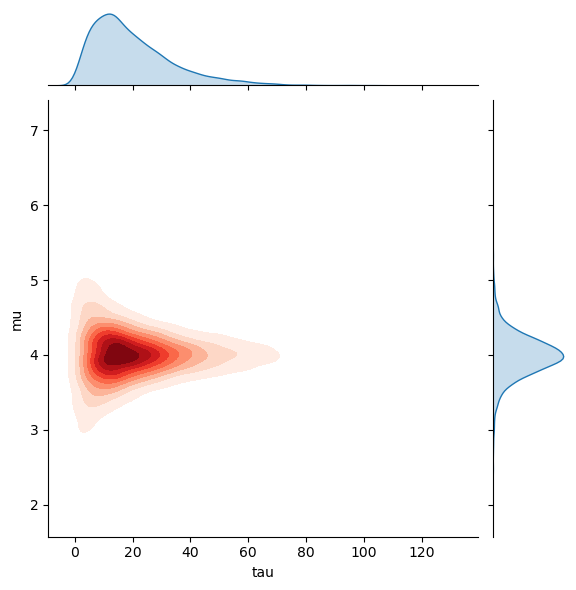

In [149]:
import pandas as pd
def sample_normal_gamma(mu0, k0, a0, b0, size=1):
    t = st.gamma(a0, scale=1/b0).rvs(size=size)
    mu = st.norm(mu0, scale=np.sqrt(1/(t * k0))).rvs()
    return mu, t

mu, t = sample_normal_gamma(mu0=4, k0=1, a0=2, b0=0.1, size=10000)
df = pd.DataFrame({'mu': mu, 'tau': t})
sns.jointplot(x=df['tau'], y=df['mu'], kind='kde', cmap='Reds', fill=True)
plt.show()

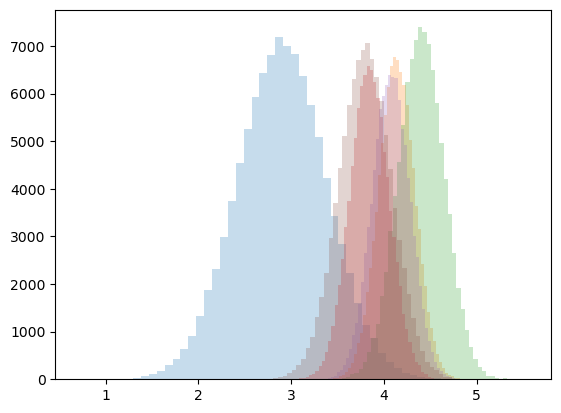

In [152]:
def sample_normal_gamma_normal(mu0, k0, a0, b0, n):
    t = st.gamma(a0, scale=1/b0).rvs()
    mu = st.norm(mu0, scale=np.sqrt(1/(t * k0))).rvs()
    y = st.norm(mu, scale=np.sqrt(1/t)).rvs(n)
    return y

for _ in range(3):
    y = sample_normal_gamma_normal(mu0=4, k0=1, a0=2, b0=0.1, n=100000)
    plt.hist(y, alpha=0.25, bins=50)

plt.show()

### **Posterior**
- See [section 3.3 of Murphy (2007)](https://www.cs.ubc.ca/~murphyk/Papers/bayesGauss.pdf) for a detailed derivation:
$$\begin{align}P(\mu, \tau \mid \boldsymbol{y};\,\mu_0, \kappa_0, a_0, b_0) &= \textrm{NG}(\mu, \tau;\, \mu_n, \kappa_n, a_n, b_n) \\[1em]
\mu_n &\triangleq \frac{\kappa_0 \mu_0 + n\bar{y}}{\kappa_0 + n} \\[1em]
\kappa_n &\triangleq \kappa_0 + n \\
a_n &= a_0 + \tfrac{n}{2} \\
b_n &= b_0 + \tfrac{1}{2}\sum_{i=1}^n (y_i - \bar{y})^2 + \frac{\kappa_0 n (\bar{y} - \mu_0)^2}{2(\kappa_0 + n)}
\end{align}
$$
- A (multivariate) **conjugate** prior!





- Plot below: Notice that the posterior concentrates much more slower than when just estimating $\mu$



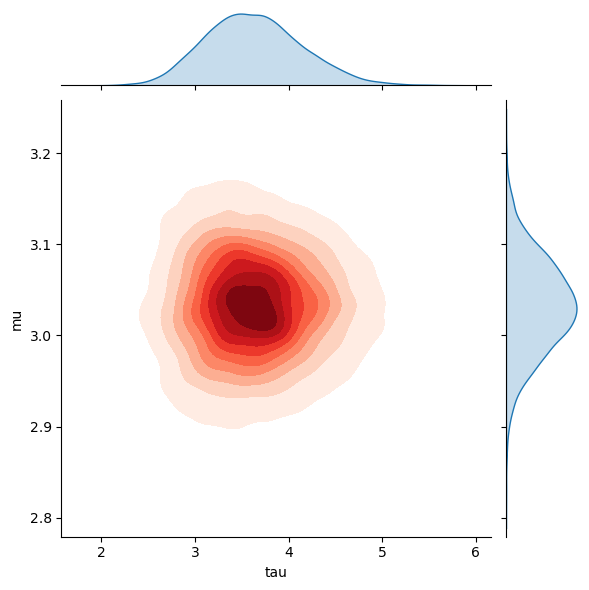

In [167]:
def get_posterior_params_normal_gamma_normal(y, mu0, k0, a0, b0):
    n = y.size
    mn = (k0 * mu0 + n*y.mean()) / (k0 + len(y))
    kn = k0 + n
    an = a0 + n/2
    bn = b0 + 0.5 * np.sum((y - y.mean())**2)
    bn += (k0 * n * (y.mean() - mu0)**2) / (2 * (k0 + n))
    return mn, kn, an, bn

mu0 = 0
k0 = 1
a0 = 0.1
b0 = 0.1

# hard code mu and tau
t = 5
mu = 3
y = st.norm(mu, scale=np.sqrt(1/t)).rvs(size=100)

mn, kn, an, bn = get_posterior_params_normal_gamma_normal(y, mu0, k0, a0, b0)
mu, t = sample_normal_gamma(mu0=mn, k0=kn, a0=an, b0=bn, size=10000)
df = pd.DataFrame({'mu': mu, 'tau': t})
sns.jointplot(x=df['tau'], y=df['mu'], kind='kde', cmap='Reds', fill=True)

plt.show()

### **Posterior marginals**
- By the definition of the normal-gamma distribution, we can rewrite the posterior as:

$$\begin{align}P(\mu, \tau \mid \boldsymbol{y};\,\mu_0, \kappa_0, a_0, b_0) &= P(\tau \mid \boldsymbol{y}; \,\dots) \, P(\mu \mid \tau, \boldsymbol{y}; \,\dots) \\[1em]
&= \Gamma(\tau; a_n, b_n) \, \mathcal{N}(\mu;\, \mu_n,\, (\tau \kappa_n)^{-1})
\end{align}
$$

- We can see that the **posterior marginals** are then:

$$\begin{align}
P(\tau \mid \boldsymbol{y}; \,\dots) &= \Gamma(\tau; a_n, b_n)\\[1em]
P(\mu \mid \tau, \boldsymbol{y};\, \dots) &= \int \Gamma(\tau; a_n, b_n) \, \mathcal{N}(\mu;\, \mu_n,\, (\tau \kappa_n)^{-1}) \textrm{d}\tau \\
&= t_{2a_n}(\mu; \mu_n, \tfrac{b_n}{a_n \kappa_n})
\end{align}
$$
- The latter is a **generalized student-$t$ distribution**, a heavy-tailed distribution:

- Generally, if $x \sim t_\nu(x;  \mu, \sigma^2)$ for $\nu$ _degrees of freedom_, then: 

$$t_\nu(x;  \mu, \sigma^2) = \frac{\Gamma(\nu/2 + 1/2)}{\Gamma(\nu/2)} \frac{1}{\sqrt{\nu \pi} \sigma} \left[1 + \tfrac{1}{\nu}\Big(\frac{x-\mu}{\sigma}\Big)^2\right]^{-\tfrac{\nu +1}{2}}$$ 

- $\nu \rightarrow \infty$ this becomes Gaussian

- $\nu = 1$ this is a **Cauchy distribution**

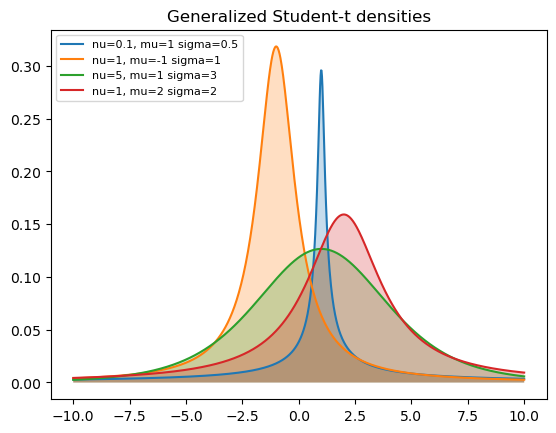

In [180]:
x = np.linspace(-10, 10, 1000)
for (nu, mu, sigma) in [(0.1, 1, 0.5), (1, -1, 1), (5, 1, 3), (1, 2, 2)]:
        plt.plot(x, st.t.pdf(x, nu, loc=mu, scale=sigma), label=f'nu={nu}, mu={mu} sigma={sigma}')
        plt.fill_between(x, st.t.pdf(x, nu, loc=mu, scale=sigma), alpha=0.25)
plt.legend(loc='upper left', fontsize=8)
plt.title('Generalized Student-t densities')
plt.show()

---

### Example: **Bayesian linear regression**

- The techniques above generalize to regression

$$
\begin{align}
\beta_j &\stackrel{\textrm{iid}}{\sim} \mathcal{N}(\mu_0, \sigma^2_0)\,\,\,\, j=1\dots p\\
y_i &\stackrel{\textrm{ind.}}{\sim} \mathcal{N}\left(\sum_{j=1}^p \beta_j x_{ij}, \sigma^2\right) \,\, i=1\dots n
\end{align}
$$

- [Derive on board] the posterior of $\beta$ for $p=1$:

$$\begin{align}
P(\beta \mid \boldsymbol{y}, \boldsymbol{x}) \,\, &\propto_{\beta} \,\, \mathcal{N}(\beta; \mu_0, \sigma_0^2) \,\,\prod_{i=1}^n \mathcal{N}(y_i;\, \beta\,x_i, \sigma^2) \\[2em]
% 
 &\propto_{\beta} \exp\left\{-\tfrac{1}{2} \left(J_n \mu^2 + 2\mu\,h_n\right)\right\} \\[2em]
%  
J_n &\triangleq \tfrac{1}{\sigma_0^2} + \tfrac{1}{\sigma^2} \boldsymbol{x}^\top \boldsymbol{x}\\
h_n &\triangleq \tfrac{\mu_0}{\sigma_0^2} + \tfrac{1}{\sigma^2} \boldsymbol{y}^\top \boldsymbol{x}\\[2em]
% 
&\propto_{\beta} \,\,\mathcal{N}(\beta;\, \underbrace{h_n J_n^{-1}}_{\triangleq \mu_n},\, \underbrace{J_n^{-1}}_{\triangleq \sigma_n^2})
\end{align}$$

- (Still conjugate.)

### **Posterior parameters**

- The **posterior mean** is equal to:
$$\begin{align}
\mu_n = h_n J_n^{-1} &= \left(\tfrac{\mu_0 \, \sigma^2}{\sigma_0^2} + \boldsymbol{y}^\top \boldsymbol{x}\right)\left(\tfrac{\sigma^2}{\sigma_0^2} + \boldsymbol{x}^\top \boldsymbol{x}\right)^{-1}
\end{align}$$

- For Gaussians, mean=mode so this is also the **maximum a posteriori (MAP) estimate** $\mu_n = \widehat{\beta}^{\textrm{MAP}}_n$.

- Now further consider an **uninformative prior** $\mu_0=0$ and define $\alpha \triangleq \tfrac{\sigma^2}{\sigma_0^2}$
$$\mu_n \equiv \widehat{\beta}^{\textrm{MAP}}_n = \boldsymbol{y}^\top \boldsymbol{x} \, \left(\alpha + \boldsymbol{x}^\top \boldsymbol{x}\right)^{-1} = \widehat{\beta}^{\textrm{Ridge}}$$

- ...we recover the solution to Ridge regression with regularization strength $\alpha$.

- The **posterior variance** is: 

$$\begin{align}
\sigma_n^2 = J_n^{-1} &= \,\left(\tfrac{1}{\sigma_0^2} + \tfrac{1}{\sigma^2} \boldsymbol{x}^\top \boldsymbol{x}\right)^{-1}
\end{align}$$

- Now consider $\sigma_0^2 \rightarrow \infty$ (a **maximally uninformative** prior); the posterior becomes

$$\begin{align}
P(\beta \mid \boldsymbol{y}, \boldsymbol{x}) = \mathcal{N}\left(\beta;\,\, \widehat{\beta}_n^{\textrm{MLE}},\, \sigma^2 (\boldsymbol{x}^\top \boldsymbol{x})^{-1}\right)
\end{align}$$

- This distribution is **symmetric with** the frequentist sampling distribution of the MLE:
$$\begin{align}
\textrm{Pr}(\widehat{\beta}_n^{\textrm{MLE}}) = \mathcal{N}\left(\widehat{\beta}_n^{\textrm{MLE}};\,\, \beta,\, \sigma^2 (\boldsymbol{x}^\top \boldsymbol{x})^{-1}\right)
\end{align}$$

- In this setting the **frequentist confidence interval** for $\beta$ coincides with the **Bayesian credible interval**, but that will rarely be the case in practice


- All of this generalizes neatly when we consider $p > 1$.

### Quick aside: the **bootstrap**
- In this simple case we have a closed-form solution for the frequentist sampling distribution of the MLE

- A very practical computational tool for approximating the sampling distribution when a closed-form is not (easily) available, is the **bootstrap**

- The algorithm is simple: we re-sample our training data **with replacement** many times, and **compute the MLE for each bootstrapped sample**. 

- Under certain regularity conditions (which do not always hold!), this procedure generates samples from the sampling distribution

- See [Larry Wasserman's lecture notes](https://www.stat.cmu.edu/~larry/=sml/Boot.pdf) for some of the technical details.

In [208]:
def bootstrap(x, y, estimator, samples=1000):
    bootstrap_samples = []
    for _ in range(samples):
        # sample training data *with* replacement
        idx = np.random.choice(range(n), size=n, replace=True)
        # compute MLE on the bootstrap sample of data
        mle = estimator(x[idx], y[idx])
        # store the MLE
        bootstrap_samples.append(mle)
    return np.array(bootstrap_samples)

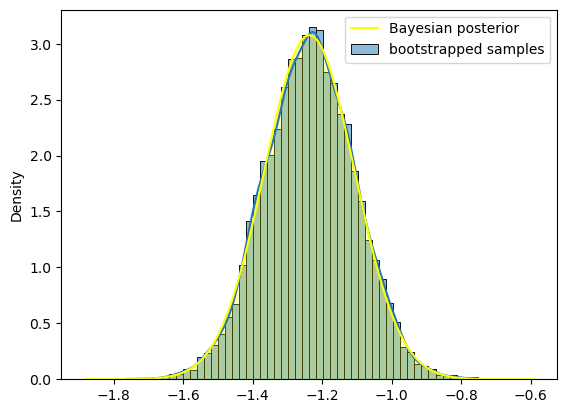

In [209]:
# bootstrap example
sigma = 4
beta = -1
n = 1000
x = st.norm(0, 1).rvs(n)
y = st.norm(x * beta, scale=sigma).rvs(n)

def ols_1d(x, y):
    return y @ x / (x @ x)

bootstrap_samples = bootstrap(x, y, estimator=ols_1d, samples=10000)
sns.histplot(bootstrap_samples, bins=50, kde=True, stat='density', label='bootstrapped samples')

# compute Bayesian posterior
beta_mle = y @ x / (x @ x)
scale_mle = np.sqrt(sigma**2 / (x @ x))
posterior = st.norm(beta_mle, scale=scale_mle)
# calculate linspace intelligently
x = np.linspace(beta_mle - 5 * scale_mle, 
                beta_mle + 5 * scale_mle, 1000)

plt.plot(x, posterior.pdf(x), color='yellow', label='Bayesian posterior')
plt.fill_between(x, posterior.pdf(x), alpha=0.25, color='yellow')
plt.legend()
plt.show()



### Some motivation for Bayesian linear regression: **uncertainty quantification**
- From Figure 9.11 of [Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)

- Bayesian linear regression with polynomial basis expansion

- Visualized is the **posterior predictive** distribution

<img src="img/bayesian_linear_regression.png" width="600" height="">

---
### The **normal means model** and shrinkage estimators

- Now consider the following model for $p$-dimensional vector $\boldsymbol{y}$
$$\begin{align}
\boldsymbol{y} &\sim \mathcal{N}(\boldsymbol{\mu},\, \textrm{I}_p\sigma^2)
\end{align}
$$

- Returning to frequentist thinking, consider the problem of getting a point estimate $\widehat{\mu}_1,\dots,\widehat{\mu}_p$

- More specifically, we seek a **decision rule** $\delta(\boldsymbol{y}) = \widehat{\boldsymbol{\mu}}$ which takes in a data point $\boldsymbol{y}=(y_1,\dots,y_p)$ and spits out a good estimate $\widehat{\boldsymbol{\mu}}$ of $\boldsymbol{\mu}$

- We will have a squared loss function, such that the **risk** of a given decision rule $\delta(\cdot)$ is
$$\begin{align}
r(\delta(\cdot)) = \mathbb{E}_{\boldsymbol{y}}\Big[\sum_{j=1}^p  \big(\mu_{j} -\delta(\boldsymbol{y})_{j}\big)^2\Big]
\end{align}
$$
- An obvious choice for decision rule is the MLE:$$\delta^{\textrm{MLE}}(\boldsymbol{y}) = \boldsymbol{y} = \widehat{\boldsymbol{\mu}}^{\textrm{MLE}}$$

- The famous James-Stein paradox is that the "usual" decision rule is **inadmissable** for $p\geq 3$!

- More specifically the MLE is always dominated (in terms of risk) by the **James-Stein estimator**:
$$\delta^{\textrm{JS}}(\boldsymbol{y}) = \left(1 - \frac{(p-2)\sigma^2}{\sum_{j=1}^p y_j^2}\right) \widehat{\boldsymbol{\mu}}^{\textrm{MLE}}$$

- Intuitively, this works due to the effects of **shrinkage**. See following visualization from [this nice YouTube video](https://www.youtube.com/watch?v=cUqoHQDinCM):

<center><img src="img/shrinkage_js.png" width="300" height=""></center>

- Another intuition is that the JS-estimator can be seen to be **using the data to estimate a prior** over $\mu$.

- Consider the following prior distribution:
$$\begin{align}
\mu_j &\stackrel{\textrm{iid.}}{\sim} \mathcal{N}(0, \sigma_0^2) \,\,\, j=1\dots p\\
\end{align}
$$

- As we saw above, the posterior mean (MAP) of $\boldsymbol{\mu}$ can be written:

$$\mathbb{E}[\boldsymbol{\mu} \mid \boldsymbol{y}] = \left(1 - \frac{\sigma^2}{\sigma^2 + p\sigma_0^2}\right)\widehat{\boldsymbol{\mu}}^{\textrm{MLE}} $$

- Now imagine estimating the prior parameter with the sample variance $\widehat{\sigma}^2_0 = \frac{1}{p}\sum_{j=1}^p y_j^2$ and plugging it in. We get a very similar estimator to the JS estimator above.

- Using the data to estimate the prior is known as **empirical Bayes**. This methodology bridges frequentist and Bayesian frameworks by motivating priors from a frequentist perspective.


----
### Some philosophy: **subjectivist interpretation of probability**
- Where do priors over parameters come from and what do they mean?

- As mentioned above, the frequency interpretation is often incoherent.

- Instead, a subjectivist interprets probabilities as **quantifying degrees of belief**

- A large value of $P(\boldsymbol{\theta} \in \mathcal{A})$ represents a strong belief that $\boldsymbol{\theta}$ takes a value in $\mathcal{A}$

- With this interpretation, any unknown quantity can be considered a random variable

#### Some **justifications** for the use of probability to quantify beliefs

- Exchangeability and De Finetti's theorem

- The Dutch books argument

- Common sense (e.g., lady drinking tea)

- ...

### **Exchangeability** and De Finetti's theorem

- **Definition:** A sequence of random variables is _infinitely exchangeable_ if for any $n$, their joint probability is invariant to any permutation $\Delta$:

$$P(y_1,\dots,y_n) = P(y_{\Delta[1]},\dots, y_{\Delta[n]})$$

- **Theorem statement:** The sequence is infinitely exchangeably if _and only if_:

$$P(y_1,\dots,y_n) = \int \left[\prod_{i=1}^n P(y_i \mid \boldsymbol{\theta})\right] \textrm{d}P(\boldsymbol{\theta})$$

- ...i.e., there exists a parameter $\boldsymbol{\theta}$, which renders the random variables **conditionally independent**, and a **mixing (prior) probability measure** $P(\boldsymbol{\theta})$.

- Exchangeability (which we often assume) implies the existence of prior-likelihood structure.

### The **"Dutch books"** argument
- The following is based heavily on Sameer Deshpande's lecture notes.
- See also Freedman [Notes on the Dutch Book Argument](https://www.stat.berkeley.edu/~freedman/dutchdef.pdf)
- $\mathcal{F}$ is a collection of events over some sample space $\Omega$
    - closed under unions: if $A,B \in \mathcal{F}$ then $A \cup B \in \mathcal{F}$
    - closed under complements: if $A \in \mathcal{F}$ then $A^c \in \mathcal{F}$

- **Gambling game**:
    - you are a Bookie playing against a Gambler

    - **you assign a price $\mu(A) \in \mathbb{R}$** for all $A \in \mathcal{F}$

    - no restrictions, all prices (even negative ones) are ok

    - once you've set your pricing function $\mu$, **the Gambler makes bets**

    - once bets are made, the occurrence of events is revealed.
    
    - the bets take the form **"bet $a$ on event $A$"** which means **the Gambler first pays you $a \times \mu(A)$**, and then, **if $A$ occurs, you pay the Gambler $a$**

    - on that bet, your **net winning would be $$a \times (\mu(A) - \mathbb{1}(A))$$**

    - there are also **conditional bets, like "bet $b$ on the event $B$ conditional on $A$"**

    - in this case, **nothing happens if $A$ does not occur**
    
    - if $A$ does occur, **the Gambler first pays you $b \times \mu(B \mid A)$**. then, **if $B$ also occurs, you pay the Gambler $b$**
    
    - your **net winning would be $$\mathbb{1}(A) \times [b \times (\mu(B \mid A) - \mathbb{1}(B))]$$**

    - the gambler can place negative bets $a < 0$

- **Theorem statement:**
    - Unless your pricing function $\mu(\cdot)$ obeys the standard axioms of a probability measure, **the Gambler is guaranteed** to be able to win money from you

- **Example:**
    - Consider the following simple example where $\mu(\cdot)$ is not a valid probabability measure on $\mathcal{F}$. 
    
    - For two disjoint events $A$ and $B$, the pricing function violates the axiom of additivity: $$\mu(A \cup B) < \mu(A) + \mu(B)$$

    - e.g., $A = $ _"Biden wins the election"_ and $B = $ _"Trump wins the election"_

    - The following sequences of bets are **guaranteed to win money**:
        - "bet -1 on $A$"
        - "bet -1 on $B$"
        - "bet 1 on $A \cup B$"
    
    - To see this, calculate your net winnings: $$\begin{align}\textrm{net} &= \mu(A \cup B) - [\mu(A) + \mu(B)] + [\mathbb{1}(A) + \mathbb{1}(B)] - \mathbb{1}(A \cup B)
    \end{align}$$
        - if $A$ occurs but not B, you win $\mu(A \cup B) - [\mu(A) + \mu(B)] < 0$
        - if $B$ occurs but not A, you win $\mu(A \cup B) - [\mu(A) + \mu(B)] < 0 $
        - if neither $A$ nor $B$ occur you win $\mu(A \cup B)-[\mu(A) + \mu(B)] < 0 $
        - if both $A$ and $B$ occur you win $\mu(A \cup B)-[\mu(A) + \mu(B)] < 0$
        - in other words, **no matter what happens you lose**
    
    - a sequence of bets that is guaranteed to make money is called a **Dutch book**

    - One can show that **if $\mu$ violates any of the axioms of a probability measure** (e.g., boundedness, conditioning) **there exists a Dutch book against it**
    
- Conclusion: probability measures are uniquely coherent structures for encoding degrees of belief.





### **Common sense** justification: Lady drinking tea

- From Berger (1985) [Statistical Decision Theory and Bayesian Analysis](https://link.springer.com/book/10.1007/978-1-4757-4286-2)

<img src="img/lady_drinking_tea.png" width="600" height="">

<!-- ### **Posterior predictive**

- The posterior predictive distribution in general is
$$P(y_{n+1} \mid \boldsymbol{y}_{1:n}; \boldsymbol{\eta})  = \int P(y_{n+1}, \boldsymbol{\theta}\mid \boldsymbol{y}_{1:n}; \boldsymbol{\eta}) \, \textrm{d}\boldsymbol{\theta}$$ -->